<a href="https://colab.research.google.com/github/Miugleofo100/estrategia.produccion/blob/main/METODO_GRAFICO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###2 PUNTO
### Caso Estrategia de produccion
Las maquinas Bodyplus100 y Bodyplus200:

>Max. $z = 2400x + 3500y$
>
>Sujeto a:
>
>$8x + 12y \leq 600$
>
>$5x + 10y \leq 450$
>
>$2x + 2y \geq 140$
>
>$x,~y \geq 0$

In [1]:
#Import las bibliotecas necesarias 
import matplotlib.pyplot as plt
import numpy as np

z= 1900.0


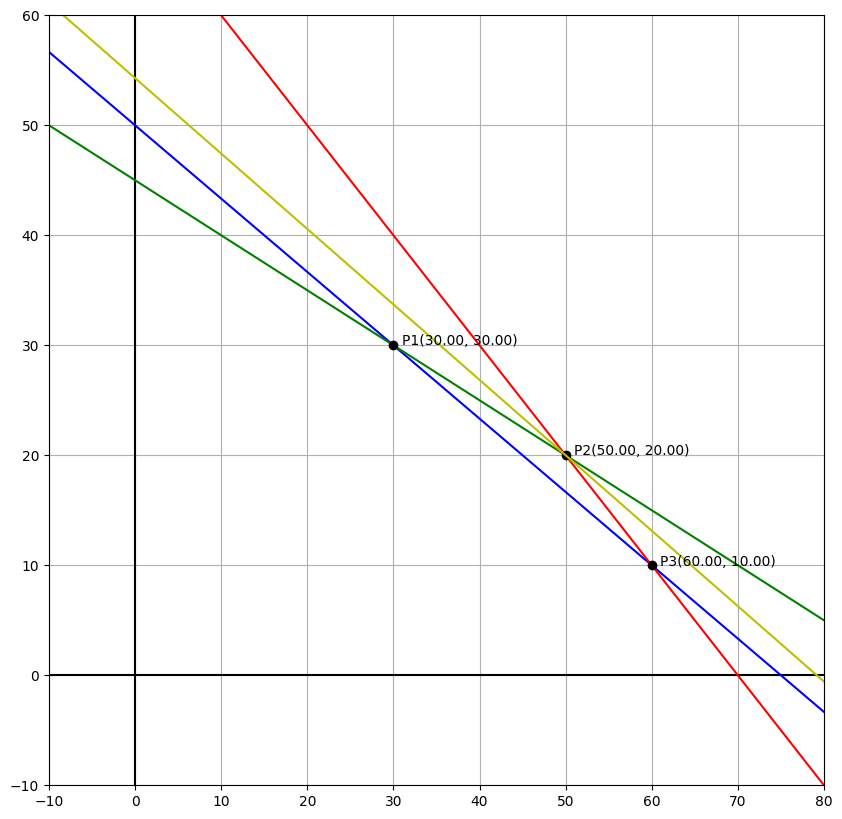

In [2]:
#Configura los ejes 

x_min = -10
x_max = 80
y_min = -10
y_max = 60
div_x = int((x_max - x_min)/10 + 1)
div_y = int((y_max - y_min)/10 + 1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.grid()

ax.set_xticks(np.linspace(x_min, x_max, div_x))
ax.set_yticks(np.linspace(y_min, y_max, div_y))

plt.hlines(y=0, xmin=x_min, xmax=x_max, colors="k")
plt.vlines(x=0, ymin=y_min, ymax=y_max, colors="k")

#Valores para la variable de decisión 

x = np.linspace(x_min, x_max, 100)

#Grafica de las restricciones 

y1 = (600 - 8*x)/12
ax.plot(x, y1, color="b")

y2 = (450 - 5*x)/10
ax.plot(x, y2, color="g")

y3 = (140 - 2*x)/2
ax.plot(x, y3, color="r")

A1 = np.array([[5., 10], [8, 12]])
b1 = np.array([450, 600])
[x1, y1] = np.linalg.solve(A1, b1)
ax.plot(x1, y1, "o", color="k")
ax.text(x1 + 1, y1, "P1({:.2f}, {:.2f})".format(x1, y1))

A2 = np.array([[5,  10], [2, 2]])
b2 = np.array([450, 140])
[x2, y2] = np.linalg.solve(A2, b2)
ax.plot(x2, y2, "o", color="k")
ax.text(x2 + 1, y2, "P2({:.2f}, {:.2f})".format(x2, y2))

A3 = np.array([[2, 2], [8, 12]])
b3 = np.array([140, 600])
[x3, y3] = np.linalg.solve(A3, b3)
ax.plot(x3, y3, "o", color="k")
ax.text(x3 + 1, y3, "P3({:.2f}, {:.2f})".format(x3, y3))

z = 24*x2 + 35*y2
print("z=", z)
y_z = (z - 24*x)/35
ax.plot(x, y_z, color="y")

plt.show()

###3 PUNTO

In [3]:
%%capture
!pip install -q pyomo
!apt-get install -y -qq coinor-cbc

In [4]:
from pyomo.environ import *

In [5]:
from pyomo.core.base import constraint
#crear un modelo 
modelo = ConcreteModel()

# Definir las variables de decisión 
modelo.x1 = Var(domain=NonNegativeReals)
modelo.y2 = Var(domain=NonNegativeReals)

#Definir funcion objetivo 
modelo.profit = Objective(expr = 24*modelo.x1 + 35*modelo.y2, sense=maximize)

#Definir las restricciones
modelo.Mecaniza_sujeción = Constraint(expr = 8*modelo.x1 + 12*modelo.y2 >= 600)
modelo.pintura_acabado = Constraint(expr = 5*modelo.x1 + 10*modelo.y2 <= 450)
modelo.ensamblaje = Constraint(expr = 2*modelo.x1 + 2*modelo.y2 <= 140)

#Vertficacion del modelo 
modelo.pprint()

2 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 24*x1 + 35*y2

3 Constraint Declarations
    Mecaniza_sujeción : Size=1, Index=None, Active=True
        Key  : Lower : Body         : Upper : Active
        None : 600.0 : 8*x1 + 12*y2 :  +Inf :   True
    ensamblaje : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : 2*x1 + 2*y2 : 140.0 :   True
    pintura_acabado : Size=1, Index=None, Active=True
        Key  : Lower : Body         : Upper : Active
        None :  -Inf : 5*x1 + 10*y2 : 450.

In [6]:
# Solución del problema de PL
%%capture
SolverFactory('cbc').solve(modelo, tee=True).write()

In [8]:
# Mostrar la solución 
print('....................')
print('Solución')
print('.....................')
print("\nFuncion objetivo: ")
print("Z =", 1000*modelo.profit(), "Dolares")

print("\nVariables de decisión: ")
print("x1 =", modelo.x1.value, "hora por produccion")
print("y2 =", modelo.y2.value, "hora por produccion")



....................
Solución
.....................

Funcion objetivo: 
Z = 1900000.0 Dolares

Variables de decisión: 
x1 = 50.0 hora por produccion
y2 = 20.0 hora por produccion
